## Ex 2: Realistic Gravity

In [1]:
import matplotlib.pyplot as plt
from space_base import GravBody, Probe
import numpy as np

# Constants
G = 6.67e-11  # Gravitational constant
earth = GravBody.earth()  # Earth as an object with mass and radius
gravity = 9.81  # simple gravity

# Initial Conditions
x0 = 0  # start position
vx0 = 850  # start vertical speed
t_num = 500_000  # number of steps in trajectory

First, we start by running the previous simulation with uniform gravity and then do the same simulation but with a more realistic approach.

In [2]:
def projectile_uniform_gravity(_, posvel):
    current_gravity = gravity
    return posvel[1], -current_gravity

t_final = (2*vx0) / gravity  # time of trajectory given
# Running Solver
probe = Probe(projectile_uniform_gravity, t_final, t_num, x0=x0, vx0=vx0, event=0)  # probe as an object
t, posvel = probe.odesolve()  # solve the differential equations
max_height_uniform_gravity = np.max(posvel, axis=0)[0]

Current gravity can be computed as follows:
$$g=\frac{GM}{(R+z)^2}$$
Where, $M$ is the earth mass, $R$ its radius and $z$ is the current altitude.
Of course, we also need to update the energy as it is now defined as:
$$E=\frac{1}{2}m*v^2 - \frac{GMm}{R+z}$$ 

In [3]:
def projectile_with_gravity(t, posvel):
    current_gravity = G * earth.mass / (earth.radius + posvel[0])**2
    return posvel[1], -current_gravity

t_final_temp = 200
# Running Solver
probe = Probe(projectile_with_gravity, t_final_temp, t_num, x0=x0, vx0=vx0, event=0)  # probe as an object
t, posvel = probe.odesolve()  # solve the differential equations

# Solver Results
max_height_realistic_gravity = np.max(posvel, axis=0)[0]
t_end = len(t) - 2
t_final_realistic_gravity = t[t_end]

With the new way of computing gravity we found that the maximum altitude if higher by:

In [4]:
max_height_realistic_gravity - max_height_uniform_gravity

198.99484451519675

As the trajectory is modified, we can assume that time of flight will also be longer.

In [5]:
t_final_realistic_gravity - t_final

1.273390518238756

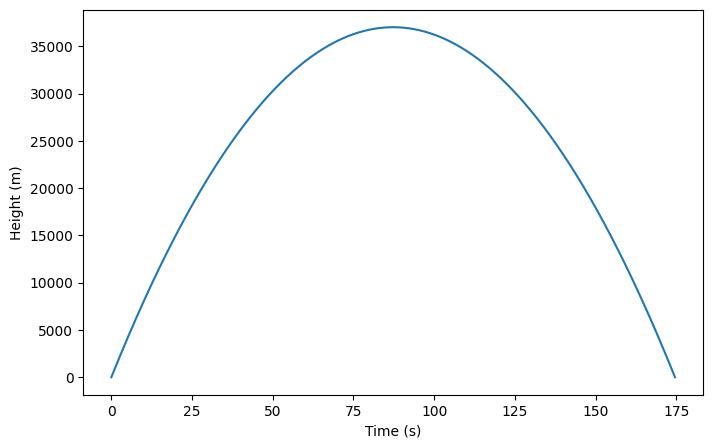

In [6]:
# Plotting
plt.figure(figsize=(8, 5))  # create figure, figsize can be changed as preferred
plt.plot(t, posvel[:, 0])  # plot time against height
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.show()  # make plot appear

We can check that the penultimate value is indeed close to zero (below 1m).

In [7]:
posvel[t_end][0] # height at the end of the trajectory (in m)

0.13790983261424117

We can now check if the energy is well conserved.

In [8]:
in_energy = 0.5 * probe.mass * posvel[0][1] ** 2 - G * earth.mass * probe.mass  / (earth.radius + posvel[0][0])  # initial energy
fin_energy = 0.5 * probe.mass * posvel[t_end][1] ** 2 - G * earth.mass * probe.mass  / (earth.radius + posvel[t_end][0])  # final energy
accuracy = (fin_energy - in_energy) / in_energy  # accuracy of solver
accuracy

-7.135652621342857e-12

We can also express the accuracy as a percentage that is close to 100% if the energy at the beginning and the end of the simulation are the same.

In [9]:
accuracy = 100 * in_energy / fin_energy  # accuracy of solver
accuracy

100.00000000071356

Or, in contrary, make an error computation in percentage (we will then want to keep this percentage as low as possible):

In [10]:
error_percentage = 100 * abs((fin_energy - in_energy) / in_energy)
error_percentage

7.135652621342857e-10